<a href="https://colab.research.google.com/github/Kimuruae/AI-Coursework-2025/blob/main/Diamonds_Price_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Members

150237 Tedd Muunda

168961 George Makau

166601 Stanley Otieno

155499 Benvictor Mwangi

166317 Edwin Sururu Kimuruae

158787 Justin Macharia

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
Number of rows: 53940
Number of columns: 11


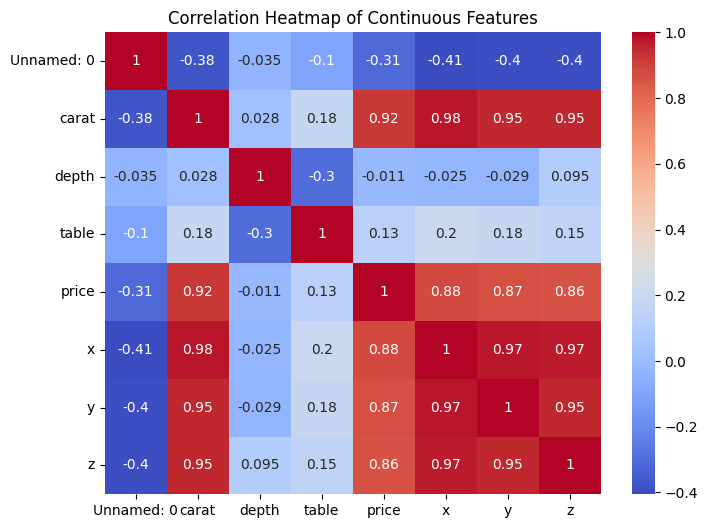

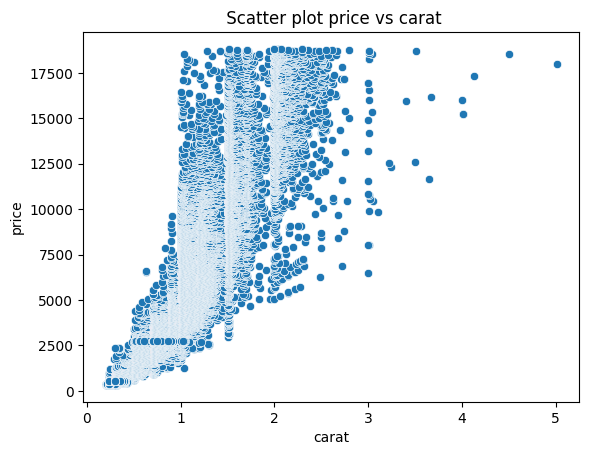

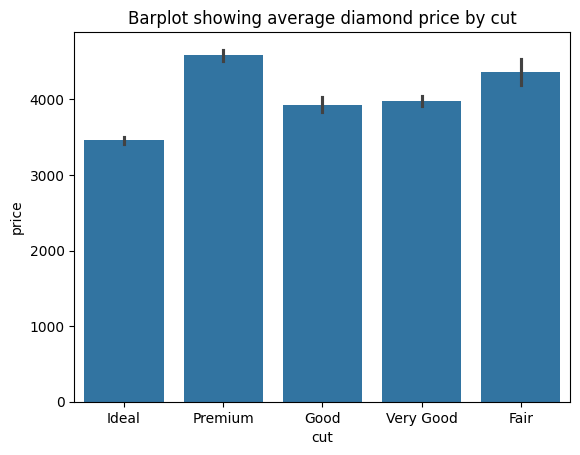

(12500, 11)

In [9]:
#1. Exploratory Data Analysis
from sklearn import pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diamonds = pd.read_csv('diamonds.csv') # updating the dataset
diamonds.head() # Preview of first few records

#Data Cleaning and Exploratory Data Analysis Process(EDA) to retriev insights into the data
diamonds.info() #Explore Data infomation
diamonds.isnull().sum #Check for missiong values
diamonds.describe() #Descriptive statistics for numeric features
print("Number of rows:", diamonds.shape[0])
print("Number of columns:", diamonds.shape[1])

#Data insights retrieved from the provided data
#1.Correlation heatmap for continuous numeric features
plt.figure(figsize=(8,6))
sns.heatmap(diamonds.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Continuous Features")
plt.show()


#2. A scatter plot (Price vs Carat)
sns.scatterplot(x='carat', y='price', data=diamonds)
plt.title(" Scatter plot price vs carat")
plt.show()


#3. Barplot average price by cut
sns.barplot(x='cut', y='price', data=diamonds)
plt.title("Barplot showing average diamond price by cut")
plt.show()

#Randomly selected records(12500) for modelling
diamonds_model = diamonds.sample(n=12500, random_state=42)
diamonds_model.shape



Exploratory Data Analysis(EDA) based sample selected records (12500,11)

1. Correlation heatmap for continuous numeric features
Dimensions (x,y,z) and depth/table show some relationship with price but less than carat. Color and clarity show smaller average differences compared to carat.

2. Scatter plot price vs carat
Carat is strongly positively correlated with price — as carat increases, price increases nonlinearly.

3. Barplot showing average diamond price by cut
Better cuts e.g., Premium have higher mean prices than poorer cuts.” e.g, ideal

In [10]:
#3. Linear Regression Model given all other featyures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np # Import numpy for sqrt

# Categorical and Numerical columns
categorical = ['cut', 'color', 'clarity']
numerical = ['carat', 'depth', 'table', 'x', 'y', 'z']
X = diamonds_model[categorical + numerical]
y = diamonds_model['price']

# Preprocessing and model pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical)
], remainder='passthrough')
linreg = Pipeline([
    ('prep', preprocessor),
    ('model', LinearRegression())
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linreg.fit(X_train, y_train)# Train model
y_pred = linreg.predict(X_test)# Predictions

# Accuracy metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Linear Regression Model Accuracy:")
print("R² Score:", round(r2, 4))
print("RMSE:", round(rmse, 2))

Linear Regression Model Accuracy:
R² Score: 0.9232
RMSE: 1103.7


In [6]:
#4. PCA - To identify 2 strongest continuous features
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select continuous variables
X_cont = diamonds_model[numerical]
y = diamonds_model['price']

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cont)

# Apply PCA
pca = PCA(n_components=2) #
X_pca = pca.fit_transform(X_scaled)

# Regression on PCA components
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
pca_model = LinearRegression()
pca_model.fit(X_train, y_train)

y_pred_pca = pca_model.predict(X_test)

print("PCA Regression Model Accuracy:")
print("R² Score:", round(r2_score(y_test, y_pred_pca), 4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_pca)), 2))

PCA Regression Model Accuracy:
R² Score: 0.8056
RMSE: 1756.03


In [7]:
#5. Lasso and Ridge Regression Models
from sklearn.linear_model import Lasso, Ridge

# Re-split data to ensure X_train and X_test are DataFrames for the preprocessor
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression
lasso = Pipeline([
    ('prep', preprocessor),
    ('model', Lasso(alpha=0.1))
])
lasso.fit(X_train_lr, y_train_lr)
lasso_pred = lasso.predict(X_test_lr)

# Ridge Regression
ridge = Pipeline([
    ('prep', preprocessor),
    ('model', Ridge(alpha=1.0))
])
ridge.fit(X_train_lr, y_train_lr)
ridge_pred = ridge.predict(X_test_lr)

# 6. Accuracy comparison between the 4 models used
models = {
    "Linear Regression": (r2, rmse),
    "PCA Regression": (r2_score(y_test, y_pred_pca), np.sqrt(mean_squared_error(y_test, y_pred_pca))),
    "Lasso": (r2_score(y_test_lr, lasso_pred), np.sqrt(mean_squared_error(y_test_lr, lasso_pred))),
    "Ridge": (r2_score(y_test_lr, ridge_pred), np.sqrt(mean_squared_error(y_test_lr, ridge_pred)))
}

for name, (r2_score_val, rmse_val) in models.items():
    print(f"{name} -> R²: {round(r2_score_val,4)}, RMSE: {round(rmse_val,2)}")

Linear Regression -> R²: 0.9232, RMSE: 1103.7
PCA Regression -> R²: 0.8056, RMSE: 1756.03
Lasso -> R²: 0.9232, RMSE: 1103.72
Ridge -> R²: 0.923, RMSE: 1105.4


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.298e+09, tolerance: 1.577e+07
  model = cd_fast.enet_coordinate_descent(


Accuracy comparison between the 4 models used.
1. Linear Regression -> R²: 0.9232, RMSE: 1103.7
2. PCA Regression -> R²: 0.8056, RMSE: 1756.03
3. Lasso -> R²: 0.9232, RMSE: 1103.72
3. Ridge -> R²: 0.923, RMSE: 1105.4

From the above, the Linear Regression model achieved the highest R² of 0.9232 with an RMSE of 1103.7, explaining about 92% of the price variation in the dataset.

The PCA-based regression used only two principal components from the numeric features. Its R² dropped to 0.8056, showing that when we reduced dimensionality, we lost information that was important for accurate price prediction.

Lasso and Ridge regressions both produced results almost identical to standard Linear Regression — R² around 0.923 and RMSE around 1104. This indicates that our base model was already well-regularized, with minimal overfitting, and regularization didn’t bring major improvement.

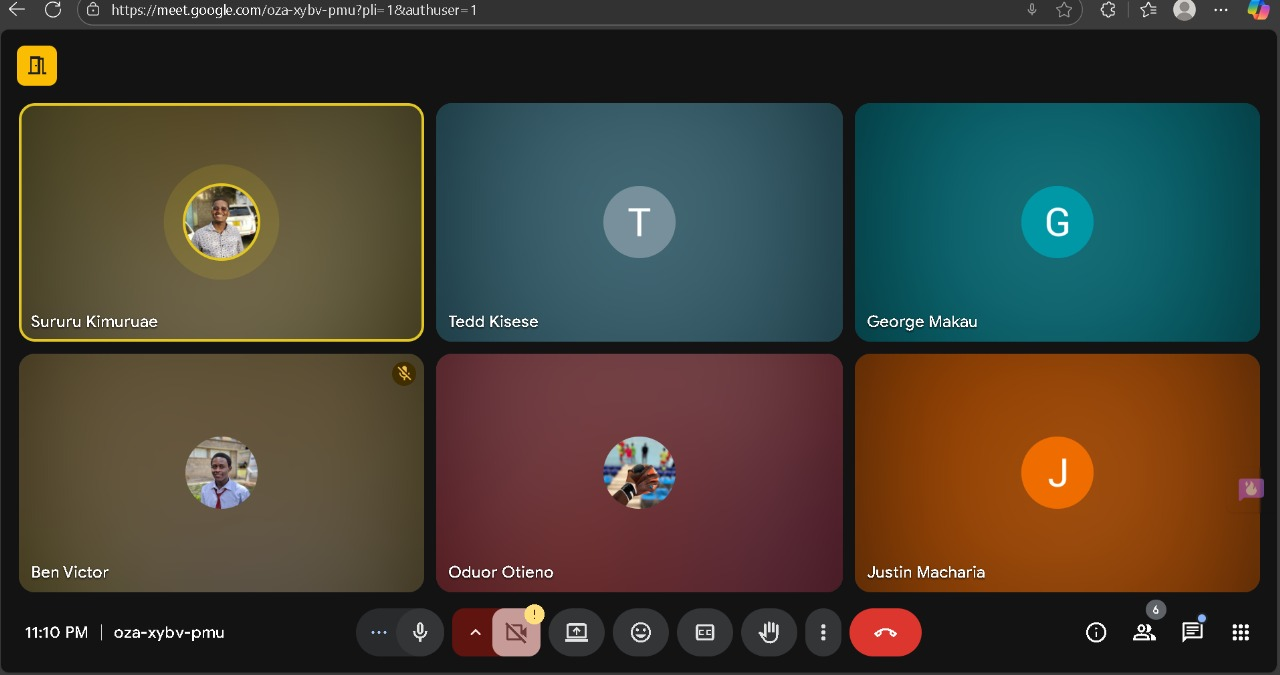